# Import library

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
sns.set()

# Import dataset 

In [58]:
raw_data = pd.read_csv(r'C:\Users\Mahira\Desktop\daboot\python\Ders 12\classification.csv')
raw_data.head()

,age,work,final weight,education,education num,marital status,occupation,relationship,race,gender,capital gained,capital lost,hours per week,native country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [59]:
raw_data.describe(include = "all")

,age,work,final weight,education,education num,marital status,occupation,relationship,race,gender,capital gained,capital lost,hours per week,native country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [60]:
raw_data.shape

(32561, 15)

In [61]:
raw_data.isnull().sum()

age               0
work              0
final weight      0
education         0
education num     0
marital status    0
occupation        0
relationship      0
race              0
gender            0
capital gained    0
capital lost      0
hours per week    0
native country    0
income            0
dtype: int64

In [62]:
raw_data.dtypes

age                int64
work              object
final weight       int64
education         object
education num      int64
marital status    object
occupation        object
relationship      object
race              object
gender            object
capital gained     int64
capital lost       int64
hours per week     int64
native country    object
income            object
dtype: object

In [63]:
for i in raw_data.columns:
    if raw_data.dtypes[i] == np.object:
        print("Column name:", i,"\n", raw_data[i].unique(),"\t",raw_data[i].nunique())

Column name: work 
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 	 9
Column name: education 
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 	 16
Column name: marital status 
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 	 7
Column name: occupation 
 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv'] 	 15
Column name: relationship 
 [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative'] 	 6
Column name: race 
 [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indi

## Data Cleaning

In [64]:
raw_data[raw_data['work'] == ' ?']

,age,work,final weight,education,education num,marital status,occupation,relationship,race,gender,capital gained,capital lost,hours per week,native country,income
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [65]:
raw_data.drop(raw_data[raw_data['work'] ==' ?'].index, inplace = True)

In [66]:
raw_data.shape

(30725, 15)

In [67]:
raw_data[raw_data['occupation'] == ' ?']

,age,work,final weight,education,education num,marital status,occupation,relationship,race,gender,capital gained,capital lost,hours per week,native country,income
5361,18,Never-worked,206359,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
10845,23,Never-worked,188535,7th-8th,4,Divorced,?,Not-in-family,White,Male,0,0,35,United-States,<=50K
14772,17,Never-worked,237272,10th,6,Never-married,?,Own-child,White,Male,0,0,30,United-States,<=50K
20337,18,Never-worked,157131,11th,7,Never-married,?,Own-child,White,Female,0,0,10,United-States,<=50K
23232,20,Never-worked,462294,Some-college,10,Never-married,?,Own-child,Black,Male,0,0,40,United-States,<=50K
32304,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,?,Wife,Black,Female,0,0,40,United-States,<=50K
32314,18,Never-worked,153663,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,<=50K


In [68]:
raw_data.drop(raw_data[raw_data['occupation'] ==' ?'].index, inplace = True)

In [69]:
raw_data.shape

(30718, 15)

In [70]:
raw_data[raw_data['native country'] == ' ?']

,age,work,final weight,education,education num,marital status,occupation,relationship,race,gender,capital gained,capital lost,hours per week,native country,income
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K
245,56,Private,203580,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,35,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32413,45,Private,199590,5th-6th,3,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,?,<=50K
32449,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
32469,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
32492,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K


In [71]:
raw_data.drop(raw_data[raw_data['native country'] ==' ?'].index, inplace = True)

In [72]:
raw_data.shape

(30162, 15)

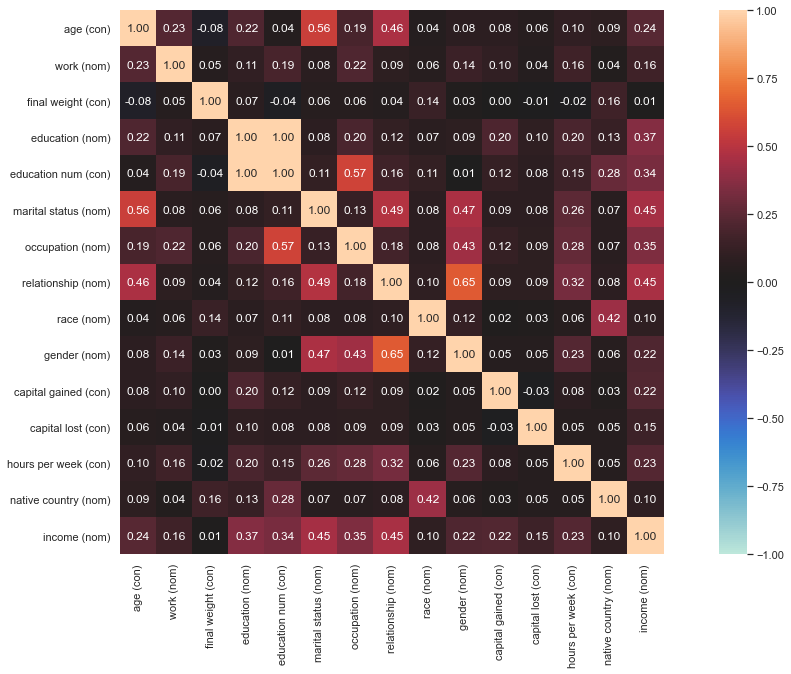

In [17]:
from dython.nominal import associations
associations(raw_data,figsize=(20,10),mark_columns=True);

In [77]:
#data_corr = raw_data.drop(['native country', 'race'], axis = 1)
data_corr = raw_data.copy()

In [78]:
data_corr.describe()

,age,final weight,education num,capital gained,capital lost,hours per week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Categorical variables - encoding

In [79]:
data_corr.head()

,age,work,final weight,education,education num,marital status,occupation,relationship,race,gender,capital gained,capital lost,hours per week,native country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [80]:
data_corr.columns

Index(['age', 'work', 'final weight', 'education', 'education num',
       'marital status', 'occupation', 'relationship', 'race', 'gender',
       'capital gained', 'capital lost', 'hours per week', 'native country',
       'income'],
      dtype='object')

In [81]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
data_corr['income'] = labelEncoder.fit_transform(data_corr['income'])
data_corr['gender'] = labelEncoder.fit_transform(data_corr['gender'])
data_corr['education'] = labelEncoder.fit_transform(data_corr['education'])
data_corr['occupation'] = labelEncoder.fit_transform(data_corr['occupation'])
data_corr['native country'] = labelEncoder.fit_transform(data_corr['native country'])

In [82]:
data_corr = pd.get_dummies(data_corr, columns = ['work',  'marital status',  'relationship', 'race'])

<AxesSubplot:>

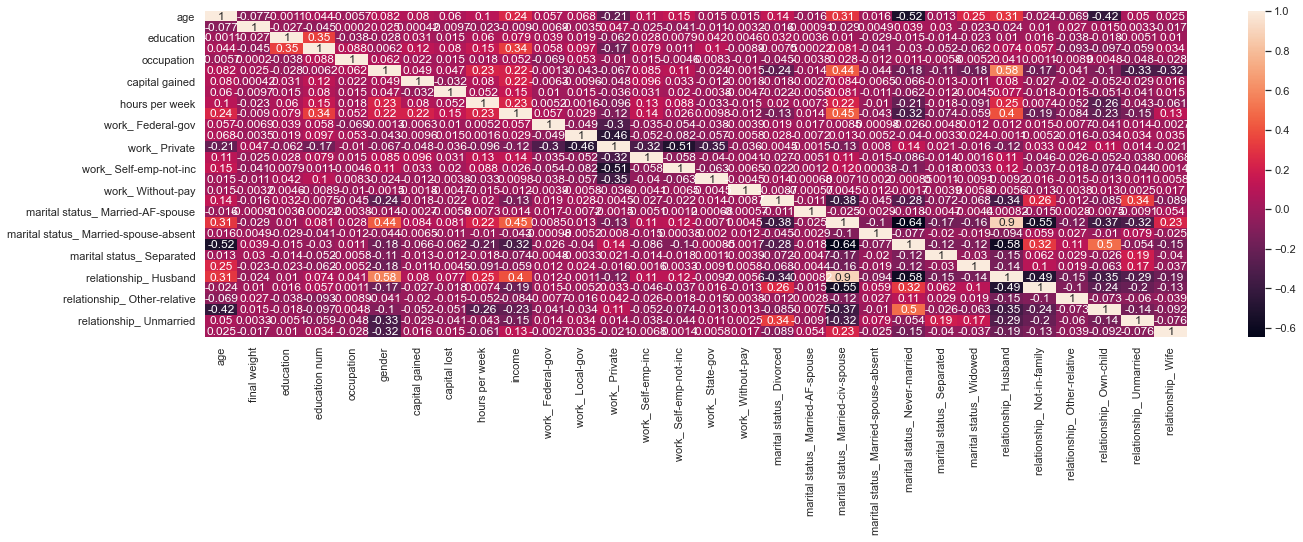

In [24]:
plt.figure(figsize = (22,6))
sns.heatmap(data_corr.corr(), annot =True)

In [25]:
df_corr = data_corr.corr()
df = pd.DataFrame(df_corr['income'])
df.sort_values('income')

,income
marital status_ Never-married,-0.320053
relationship_ Own-child,-0.226186
relationship_ Not-in-family,-0.193258
relationship_ Unmarried,-0.145799
marital status_ Divorced,-0.132030
work_ Private,-0.117218
relationship_ Other-relative,-0.084457
marital status_ Separated,-0.074056
marital status_ Widowed,-0.059097
marital status_ Married-spouse-absent,-0.042562


In [26]:
data_corr.columns

Index(['age', 'final weight', 'education', 'education num', 'occupation',
       'gender', 'capital gained', 'capital lost', 'hours per week', 'income',
       'work_ Federal-gov', 'work_ Local-gov', 'work_ Private',
       'work_ Self-emp-inc', 'work_ Self-emp-not-inc', 'work_ State-gov',
       'work_ Without-pay', 'marital status_ Divorced',
       'marital status_ Married-AF-spouse',
       'marital status_ Married-civ-spouse',
       'marital status_ Married-spouse-absent',
       'marital status_ Never-married', 'marital status_ Separated',
       'marital status_ Widowed', 'relationship_ Husband',
       'relationship_ Not-in-family', 'relationship_ Other-relative',
       'relationship_ Own-child', 'relationship_ Unmarried',
       'relationship_ Wife'],
      dtype='object')

# Multicollinearity

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# most correlated numerical cols with income
variables = data_corr[['age', 'final weight', 'education num', 'capital gained', 'capital lost', 'hours per week']]
vif = pd.DataFrame()
vif["Features"] = variables.columns
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif.sort_values(by=['VIF'])

,Features,VIF
3,capital gained,1.033612
4,capital lost,1.057617
1,final weight,3.686859
0,age,7.835952
5,hours per week,10.615610
2,education num,11.387562


In [84]:
data_corr.columns

Index(['age', 'final weight', 'education', 'education num', 'occupation',
       'gender', 'capital gained', 'capital lost', 'hours per week',
       'native country', 'income', 'work_ Federal-gov', 'work_ Local-gov',
       'work_ Private', 'work_ Self-emp-inc', 'work_ Self-emp-not-inc',
       'work_ State-gov', 'work_ Without-pay', 'marital status_ Divorced',
       'marital status_ Married-AF-spouse',
       'marital status_ Married-civ-spouse',
       'marital status_ Married-spouse-absent',
       'marital status_ Never-married', 'marital status_ Separated',
       'marital status_ Widowed', 'relationship_ Husband',
       'relationship_ Not-in-family', 'relationship_ Other-relative',
       'relationship_ Own-child', 'relationship_ Unmarried',
       'relationship_ Wife', 'race_ Amer-Indian-Eskimo',
       'race_ Asian-Pac-Islander', 'race_ Black', 'race_ Other',
       'race_ White'],
      dtype='object')

# Declare inputs and target

In [85]:
# The target(s) (dependent variable) is 'Working area'
target = data_corr['income']

# The inputs are everything BUT the dependent variable, so we can simply drop it
# inputs = data.iloc[:, 1:].values
inputs = data_corr[['age', 'final weight', 'education', 'education num', 'occupation',
       'gender', 'capital gained', 'capital lost', 'hours per week',
       'native country', 'income', 'work_ Federal-gov', 'work_ Local-gov',
       'work_ Private', 'work_ Self-emp-inc', 'work_ Self-emp-not-inc',
       'work_ State-gov', 'work_ Without-pay', 'marital status_ Divorced',
       'marital status_ Married-AF-spouse',
       'marital status_ Married-civ-spouse',
       'marital status_ Married-spouse-absent',
       'marital status_ Never-married', 'marital status_ Separated',
       'marital status_ Widowed', 'relationship_ Husband',
       'relationship_ Not-in-family', 'relationship_ Other-relative',
       'relationship_ Own-child', 'relationship_ Unmarried',
       'relationship_ Wife', 'race_ Amer-Indian-Eskimo',
       'race_ Asian-Pac-Islander', 'race_ Black', 'race_ Other',
       'race_ White'
       ]]

# Data Scaling

In [86]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)
inputs_scaled

array([[ 0.04279571, -1.0627216 , -0.34986472, ..., -0.32096262,
        -0.08785073,  0.40382431],
       [ 0.88028814, -1.00787131, -0.34986472, ..., -0.32096262,
        -0.08785073,  0.40382431],
       [-0.03333996,  0.24469349,  0.17476277, ..., -0.32096262,
        -0.08785073,  0.40382431],
       ...,
       [ 1.48937355, -0.3585745 ,  0.17476277, ..., -0.32096262,
        -0.08785073,  0.40382431],
       [-1.25151078,  0.11070545,  0.17476277, ..., -0.32096262,
        -0.08785073,  0.40382431],
       [ 1.0325595 ,  0.92884082,  0.17476277, ..., -0.32096262,
        -0.08785073,  0.40382431]])

# Train test splitting 

In [87]:
# Import the module for the split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.3, random_state = 42, shuffle  = True)

# Random Forest Classification

In [88]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred =clf.predict(x_test)

In [89]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy with Random Forest Classifier default:",round(metrics.accuracy_score(y_test, y_pred)*100, 2), '%')

Accuracy with Random Forest Classifier default: 100.0 %


In [90]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm)
cm_df

,0,1
0,6767,0
1,0,2282


In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6767
           1       1.00      1.00      1.00      2282

    accuracy                           1.00      9049
   macro avg       1.00      1.00      1.00      9049
weighted avg       1.00      1.00      1.00      9049



## Random Forest Classifier with Randomized Search

In [ ]:
y_predRAND = rfc_random.predict(x_test)

In [ ]:
accuracyRAND = metrics.accuracy_score(y_test, y_predRAND)
print('Accuracy (RandomizedCV):', round(accuracyRAND*100, 2), '%')

In [ ]:
print(classification_report(y_test, y_predRAND))

# Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(solver='liblinear', random_state=0)

In [93]:
reg.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [94]:
y_predLog = reg.predict(x_test)

In [95]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy with Logistic Regression:",round(metrics.accuracy_score(y_test, y_predLog)*100, 2), '%')

Accuracy with Logistic Regression: 80.58 %


In [96]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predLog)
cm_df = pd.DataFrame(cm)
cm_df

,0,1
0,6588,179
1,1578,704


In [97]:
print(classification_report(y_test, y_predLog))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      6767
           1       0.80      0.31      0.44      2282

    accuracy                           0.81      9049
   macro avg       0.80      0.64      0.66      9049
weighted avg       0.80      0.81      0.77      9049



## Logistic Regression with Grid Search

In [53]:
import warnings
warnings.filterwarnings('ignore')

In [54]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C": np.logspace(-3,1,7), "penalty":["l1","l2"]} # l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ", logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.004641588833612777, 'penalty': 'l2'}
accuracy : 0.7921184174167061


In [55]:
print(classification_report(y_test, logreg_cv.predict(x_test)))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87      6767
           1       0.71      0.25      0.37      2282

    accuracy                           0.79      9049
   macro avg       0.75      0.61      0.62      9049
weighted avg       0.77      0.79      0.74      9049



# KNN classification

In [98]:
from sklearn.neighbors import KNeighborsClassifier
classifier_def = KNeighborsClassifier()
classifier_def.fit(x_train, y_train)

KNeighborsClassifier()

In [99]:
y_predKNN = classifier_def.predict(x_test)

In [100]:
cm = confusion_matrix(y_test, y_predKNN)
conmat_df = pd.DataFrame(cm)
conmat_df.columns = ['Predicted 0','Predicted 1']
conmat_df = conmat_df.rename(index={0: 'Real Value 0',1:'Real Value 1'})
conmat_df

,Predicted 0,Predicted 1
Real Value 0,6205,562
Real Value 1,1613,669


In [101]:
accuracyKNN = metrics.accuracy_score(y_test,y_predKNN)
print('Accuracy for KNN (Default K value):', round(accuracyKNN*100, 2), '%')

Accuracy (Default K value): 75.96 %


## KNN with Randomized Search

In [102]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import neighbors
n_neighbors = [int(x) for x in np.linspace(start = 1, stop = 30, num = 5)]
leaf_size=[int(x) for x in np.linspace(start = 1, stop = 100, num = 5)]

params = {'n_neighbors': n_neighbors, 'leaf_size':leaf_size}

knn = neighbors.KNeighborsClassifier()

model = RandomizedSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 22, 'leaf_size': 1}

In [103]:
classifier_rand = KNeighborsClassifier(n_neighbors= 22, leaf_size = 1)
classifier_rand.fit(x_train, y_train)
# Predicted values
y_pred2 = classifier_rand.predict(x_test)

In [104]:
accuracy2 = metrics.accuracy_score(y_test,y_pred2)
print('Accuracy (Randomized Search):', round(accuracy2*100, 2), '%')

Accuracy (Randomized Search): 78.62 %


# Support Vector classification

In [105]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
svmodel = svm.SVC(kernel='rbf') # RBF Kernel

In [106]:
#Train the model using the training sets
svmodel.fit(x_train, y_train)

#Predict the response for test dataset
y_predSVC = svmodel.predict(x_test)

In [107]:
print("Accuracy with Support Vector:", round(metrics.accuracy_score(y_test, y_predSVC)*100, 2), '%')

Accuracy with Support Vector: 78.07 %


In [108]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_predSVC)
cm_df = pd.DataFrame(cm)
cm_df

,0,1
0,6760,7
1,1977,305


In [109]:
print(classification_report(y_test, svmodel.predict(x_test)))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      6767
           1       0.98      0.13      0.24      2282

    accuracy                           0.78      9049
   macro avg       0.88      0.57      0.55      9049
weighted avg       0.83      0.78      0.71      9049



In [112]:
print("Accuracy with Random Forest Classifier default:",round(metrics.accuracy_score(y_test, y_pred)*100, 2), '%')
print("Accuracy with Logistic Regression:",round(metrics.accuracy_score(y_test, y_predLog)*100, 2), '%')
print("Accuracy of Logistic Regression with Grid Search :", round((logreg_cv.best_score_)*100,2), '%')
print('Accuracy for KNN (Default K value):', round(accuracyKNN*100, 2), '%')
print('Accuracy of KNN (Randomized Search):', round(accuracy2*100, 2), '%')
print("Accuracy with Support Vector:", round(metrics.accuracy_score(y_test, y_predSVC)*100, 2), '%')

Accuracy with Random Forest Classifier default: 100.0 %
Accuracy with Logistic Regression: 80.58 %
Accuracy of Logistic Regression with Grid Search : 79.21 %
Accuracy for KNN (Default K value): 75.96 %
Accuracy of KNN (Randomized Search): 78.62 %
Accuracy with Support Vector: 78.07 %
